In [ ]:
from google.colab import drive

In [ ]:
# Google Drive'ı bağlama
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:


train_folder="/content/drive/MyDrive/Colab Notebooks/inputs/train"
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 7624 files belonging to 53 classes.


In [ ]:


valid_folder="/content/drive/MyDrive/Colab Notebooks/inputs/valid"
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_folder,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 265 files belonging to 53 classes.


In [ ]:
label_to_class_name = dict(zip(range(len(train_ds.class_names)), train_ds.class_names))
label_to_class_name

{0: 'ace of clubs',
 1: 'ace of diamonds',
 2: 'ace of hearts',
 3: 'ace of spades',
 4: 'eight of clubs',
 5: 'eight of diamonds',
 6: 'eight of hearts',
 7: 'eight of spades',
 8: 'five of clubs',
 9: 'five of diamonds',
 10: 'five of hearts',
 11: 'five of spades',
 12: 'four of clubs',
 13: 'four of diamonds',
 14: 'four of hearts',
 15: 'four of spades',
 16: 'jack of clubs',
 17: 'jack of diamonds',
 18: 'jack of hearts',
 19: 'jack of spades',
 20: 'joker',
 21: 'king of clubs',
 22: 'king of diamonds',
 23: 'king of hearts',
 24: 'king of spades',
 25: 'nine of clubs',
 26: 'nine of diamonds',
 27: 'nine of hearts',
 28: 'nine of spades',
 29: 'queen of clubs',
 30: 'queen of diamonds',
 31: 'queen of hearts',
 32: 'queen of spades',
 33: 'seven of clubs',
 34: 'seven of diamonds',
 35: 'seven of hearts',
 36: 'seven of spades',
 37: 'six of clubs',
 38: 'six of diamonds',
 39: 'six of hearts',
 40: 'six of spades',
 41: 'ten of clubs',
 42: 'ten of diamonds',
 43: 'ten of hear

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


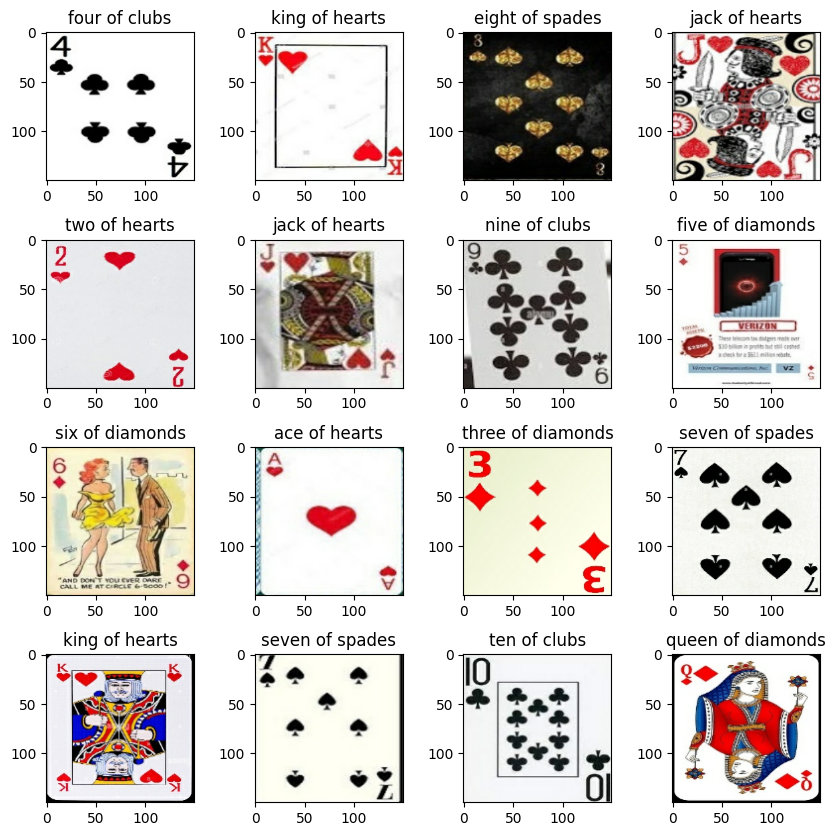

In [ ]:
data_iterator = train_ds.as_numpy_iterator()
batch = data_iterator.next()

# Create a 4x4 grid of subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

# Iterate through the images and labels in the batch
for i in range(4):  # Loop for rows
    for j in range(4):  # Loop for columns
        index = i * 4 + j  # Calculate the index for accessing the images and labels

        # Display the image
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])

# Adjust the spacing between subplots to make them look good
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

In [ ]:
train_ds=train_ds.map(lambda x,y:(x/255,y))
val_ds=val_ds.map(lambda x,y:(x/255,y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D





In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(53, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
239/239 [==============================] - 969s 4s/step - loss: 2.6572 - accuracy: 0.3259 - val_loss: 1.5575 - val_accuracy: 0.5660
Epoch 2/15
239/239 [==============================] - 226s 945ms/step - loss: 1.3273 - accuracy: 0.6477 - val_loss: 1.3019 - val_accuracy: 0.6679
Epoch 3/15
239/239 [==============================] - 220s 920ms/step - loss: 0.5936 - accuracy: 0.8458 - val_loss: 1.3146 - val_accuracy: 0.7057
Epoch 4/15
239/239 [==============================] - 225s 943ms/step - loss: 0.2866 - accuracy: 0.9289 - val_loss: 1.6531 - val_accuracy: 0.6943
Epoch 5/15
239/239 [==============================] - 218s 913ms/step - loss: 0.1680 - accuracy: 0.9631 - val_loss: 1.6681 - val_accuracy: 0.6981
Epoch 6/15
239/239 [==============================] - 222s 932ms/step - loss: 0.1329 - accuracy: 0.9734 - val_loss: 1.4880 - val_accuracy: 0.7472
Epoch 7/15
239/239 [==============================] - 226s 945ms/step - loss: 0.0758 - accuracy: 0.9852 - val_loss: 1.5846 - va

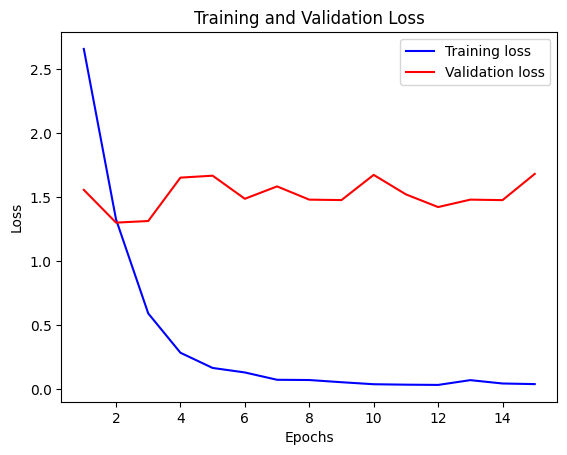

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

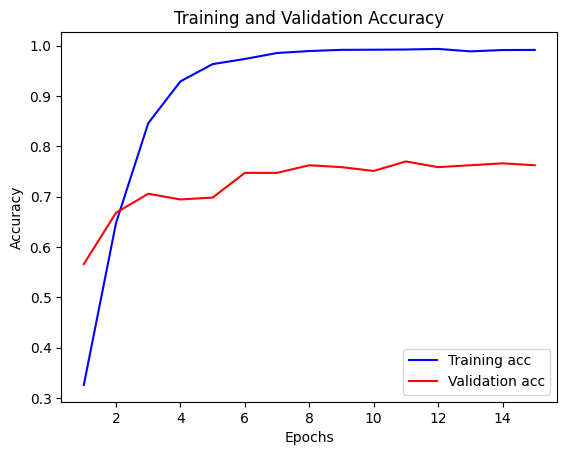

In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

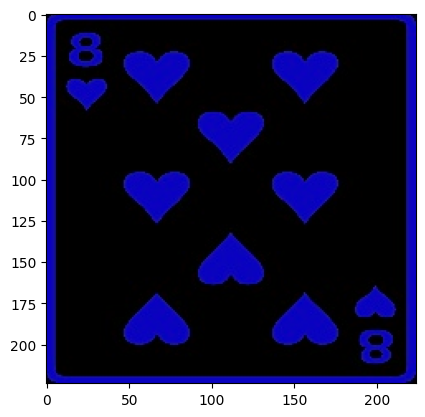

1/1 [==============================] - 0s 20ms/step


'eight of hearts'

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/inputs/test/eight of hearts/3.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/inputs/model/model.pt')

In [ ]:
###model 2 with VGG16

In [ ]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=53,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(53, activation='softmax'))
pretrained_model.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:


VGG_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 53)                27189     
                                                      

In [ ]:


epochs=15
history = VGG_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/15
239/239 [==============================] - 26s 84ms/step - loss: 2.9257 - accuracy: 0.2798 - val_loss: 1.8790 - val_accuracy: 0.4906
Epoch 2/15
239/239 [==============================] - 17s 71ms/step - loss: 1.9311 - accuracy: 0.4831 - val_loss: 1.4607 - val_accuracy: 0.5811
Epoch 3/15
239/239 [==============================] - 17s 70ms/step - loss: 1.6015 - accuracy: 0.5660 - val_loss: 1.3472 - val_accuracy: 0.5811
Epoch 4/15
239/239 [==============================] - 17s 71ms/step - loss: 1.4137 - accuracy: 0.6118 - val_loss: 1.2732 - val_accuracy: 0.6189
Epoch 5/15
239/239 [==============================] - 17s 70ms/step - loss: 1.2907 - accuracy: 0.6386 - val_loss: 1.1918 - val_accuracy: 0.6226
Epoch 6/15
239/239 [==============================] - 17s 70ms/step - loss: 1.1891 - accuracy: 0.6634 - val_loss: 1.2187 - val_accuracy: 0.6415
Epoch 7/15
239/239 [==============================] - 17s 70ms/step - loss: 1.1223 - accuracy: 0.6779 - val_loss: 1.1914 - val_accuracy:

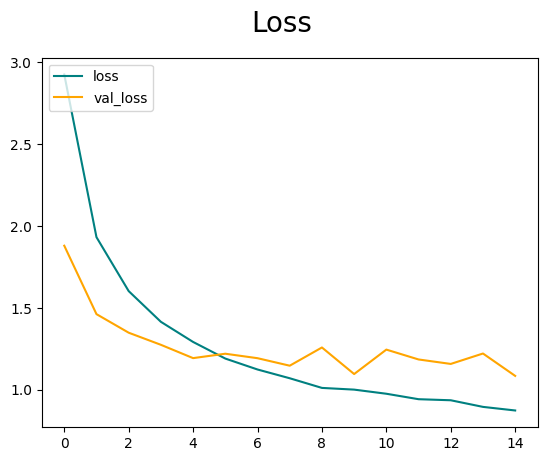

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

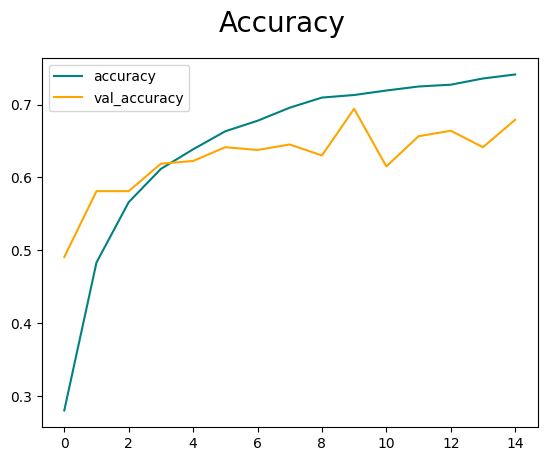

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

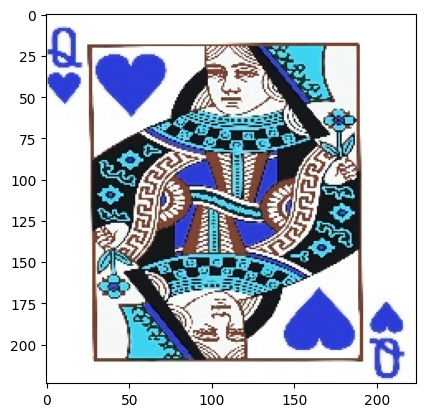

1/1 [==============================] - 0s 19ms/step


'queen of hearts'

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/inputs/test/queen of hearts/1.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/inputs/cards.csv')
df.head(5)

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [ ]:
df_test=df[df['data set']=='test']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df_test['labels_num']=label_encoder.fit_transform(df_test.labels)
# Fit the label encoder to your list of labels and transform them into numerical values
df_test.head(5)

<ipython-input-42-b51b798c4927>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['labels_num']=label_encoder.fit_transform(df_test.labels)


,class index,filepaths,labels,card type,data set,labels_num
7625,0,test/ace of clubs/1.jpg,ace of clubs,ace,test,0
7626,0,test/ace of clubs/2.jpg,ace of clubs,ace,test,0
7627,0,test/ace of clubs/3.jpg,ace of clubs,ace,test,0
7628,0,test/ace of clubs/4.jpg,ace of clubs,ace,test,0
7629,0,test/ace of clubs/5.jpg,ace of clubs,ace,test,0


In [ ]:
label=df.labels.unique()

In [ ]:
str_to_add = "/content/drive/MyDrive/Colab Notebooks/inputs/"
df_test['filepaths'] =str_to_add+df_test['filepaths']

<ipython-input-44-fe53fd84f7d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['filepaths'] =str_to_add+df_test['filepaths']


In [ ]:
pred=[]
for loc in df_test.filepaths:
    img = cv2.imread(loc)
    resize = tf.image.resize(img, (150,150))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    max_index = np.argmax(yhat)
    pred.append(max_index)
df_test['pred_label']=pred



1/1 [==============================] - 0s 29ms/step


<ipython-input-45-89ef321aca55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_label']=pred


In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
class_report = classification_report(df_test['labels_num'],df_test['pred_label'],target_names=label)
print("Classification Report:\n", class_report)



Classification Report:
                    precision    recall  f1-score   support

     ace of clubs       0.56      1.00      0.71         5
  ace of diamonds       1.00      0.20      0.33         5
    ace of hearts       0.75      0.60      0.67         5
    ace of spades       0.45      1.00      0.62         5
   eight of clubs       0.80      0.80      0.80         5
eight of diamonds       1.00      0.20      0.33         5
  eight of hearts       0.67      0.40      0.50         5
  eight of spades       0.62      1.00      0.77         5
    five of clubs       0.60      0.60      0.60         5
 five of diamonds       1.00      0.60      0.75         5
   five of hearts       0.75      0.60      0.67         5
   five of spades       0.56      1.00      0.71         5
    four of clubs       0.30      0.60      0.40         5
 four of diamonds       0.50      0.40      0.44         5
   four of hearts       0.43      0.60      0.50         5
   four of spades       0.60   